In [1]:
# Khai báo thư viện
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Tắt cảnh báo
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Đọc tập dữ liệu
path = "Mall_Customers.csv"
df = pd.read_csv(path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [3]:
#Hiển thị 5 bản ghi đầu tiên:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
#Sử dụng 3 thuộc tính Age, Income, Score để phân cụm dữ liệu
data_cluster = df.iloc[:,2:]
data_cluster.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


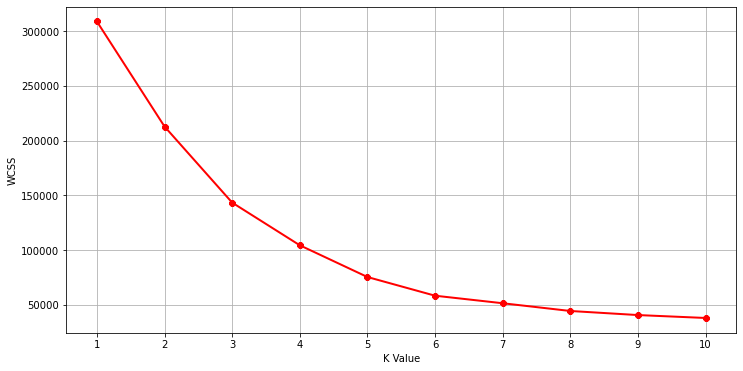

In [5]:
# Phương pháp khuỷu tay
from sklearn.cluster import KMeans
wcss = []
#Thử số cụm (n_clusters) thay đổi từ 1 đến 10
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(df.iloc[:,2:])
    wcss.append(kmeans.inertia_)

#Trực quan hóa lên biểu đồ:
plt.figure(figsize=(12,6))    
plt.grid(True)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [6]:
from sklearn.cluster import KMeans

#Thực hiện phân thành 5 cụm, các tham số khác sử dụng mặc định
model_km = KMeans(n_clusters=5)

#Liệt kê các tham số của mô hình
model_km.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 5,
 'n_init': 10,
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [7]:
model_km.fit_predict(df.iloc[:,2:])

#Tạo cột Cluster để cho biết mẫu thuộc cụm nào
df["Cluster"] = model_km.labels_
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,0
2,3,Female,20,16,6,4
3,4,Female,23,16,77,0
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,3
196,197,Female,45,126,28,1
197,198,Male,32,126,74,3
198,199,Male,32,137,18,1


2    79
3    39
1    37
4    23
0    22
Name: Cluster, dtype: int64


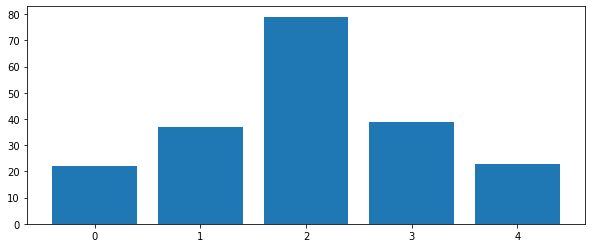

In [8]:
#Thống kê số lượng khách hàng theo mỗi cụm:
sum_cluster = df.Cluster.value_counts()
print(sum_cluster)

#Trực quan hóa dữ liệu
plt.figure(figsize=(10,4))
plt.bar(sum_cluster.index, sum_cluster.values)
plt.show()

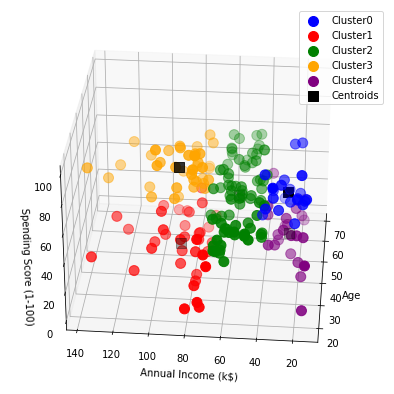

In [9]:
#Trực quan hóa phân cụm
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.Cluster == 0], df["Annual Income (k$)"][df.Cluster == 0], df["Spending Score (1-100)"][df.Cluster == 0], c='blue', s=100,label='Cluster0')
ax.scatter(df.Age[df.Cluster == 1], df["Annual Income (k$)"][df.Cluster == 1], df["Spending Score (1-100)"][df.Cluster == 1], c='red', s=100,label='Cluster1')
ax.scatter(df.Age[df.Cluster == 2], df["Annual Income (k$)"][df.Cluster == 2], df["Spending Score (1-100)"][df.Cluster == 2], c='green', s=100,label='Cluster2')
ax.scatter(df.Age[df.Cluster == 3], df["Annual Income (k$)"][df.Cluster == 3], df["Spending Score (1-100)"][df.Cluster == 3], c='orange', s=100,label='Cluster3')
ax.scatter(df.Age[df.Cluster == 4], df["Annual Income (k$)"][df.Cluster == 4], df["Spending Score (1-100)"][df.Cluster == 4], c='purple', s=100,label='Cluster4')
ax.scatter(model_km.cluster_centers_[:, 0], 
           model_km.cluster_centers_[:, 1],
           model_km.cluster_centers_[:, 2], 
           color = 'black', label = 'Centroids',s=100,marker='s')
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [10]:
#Vị trí tâm của các cụm
np.round(model_km.cluster_centers_,1)

array([[25.3, 25.7, 79.4],
       [40.3, 87.4, 18.2],
       [43.1, 54.8, 49.8],
       [32.7, 86.5, 82.1],
       [45.2, 26.3, 20.9]])